In [1]:
import requests
import bs4
from bs4 import BeautifulSoup

In [2]:
# 강아지 
import json
from pprint import pprint

base_url= 'https://www.pimfyvirus.com/dataurl_action/homeprotectionlist/p=/search/01/p={}//'
# print(type(base_url))


req_header = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36",
    "X-Requested-With": "XMLHttpRequest" #파일구조가 Json이라 필요 
}

dog_data_list = list()

for  i in range(1,186): #페이지 범위 
    url=base_url.format(i)
    #network에서 응답이 post로 처리하게 되어있음 
    res=requests.post(url,headers=req_header)

    

    if(res.ok):
        # print(res.url)
        data = res.json()
        
        for item in data.get('lst',[]):
            dog_data_dict = dict()
            
            link = item['wish']
            dog_id = link.strip('/').split('/')[-1]     
            tags=item['tag']  
            breed = item['info23']
            date = item['info2']
            t2 = item['t2']

            parts = t2.split("/")
            name = parts[0] 
            gender = parts[1] 
            weight = parts[2] 

            #dict 저장 
            dog_data_dict['ID']= dog_id
            dog_data_dict['tags']= tags
            dog_data_dict['이름']= name
            dog_data_dict['성별']= gender
            dog_data_dict['몸무게']= weight
            dog_data_dict['종']= breed
            dog_data_dict['공고날짜 ']= date
            
            dog_data_list.append(dog_data_dict)                 
    else:
        print(f'Error Code = {res.status_code}') 


print(len(dog_data_list))
pprint(dog_data_list) 

2219
[{'ID': '2970',
  'tags': ['임보가능', '긴급임보'],
  '공고날짜 ': '2025-07-31',
  '몸무게': '2kg',
  '성별': '여',
  '이름': '[댕잇슈] 로제',
  '종': '믹스'},
 {'ID': '2969',
  'tags': ['임보가능', '릴레이임보'],
  '공고날짜 ': '2025-07-31',
  '몸무게': '13kg',
  '성별': '여',
  '이름': '엘리',
  '종': '믹스'},
 {'ID': '2968',
  'tags': ['임보가능', '일반임보'],
  '공고날짜 ': '2025-07-31',
  '몸무게': '6kg',
  '성별': '남',
  '이름': '단비',
  '종': '품종'},
 {'ID': '2967',
  'tags': ['임보가능', '입양전제'],
  '공고날짜 ': '2025-07-30',
  '몸무게': '5kg',
  '성별': '여',
  '이름': '니콜',
  '종': '믹스'},
 {'ID': '2966',
  'tags': ['임보가능', '단기임보'],
  '공고날짜 ': '2025-07-30',
  '몸무게': '9kg',
  '성별': '여',
  '이름': '나오미',
  '종': '믹스'},
 {'ID': '2965',
  'tags': ['임보중', '단기임보'],
  '공고날짜 ': '2025-07-30',
  '몸무게': '7kg',
  '성별': '여',
  '이름': '윈터',
  '종': '믹스'},
 {'ID': '2964',
  'tags': ['임보가능', '일반임보'],
  '공고날짜 ': '2025-07-29',
  '몸무게': '2kg',
  '성별': '여',
  '이름': '[함안길천사]다나',
  '종': '믹스'},
 {'ID': '2963',
  'tags': ['임보가능', '일반임보'],
  '공고날짜 ': '2025-07-29',
  '몸무게': '2kg',
  '성별': '여',


In [3]:
import json 

with open('data/dog_data.json','w',encoding='utf-8') as file:
    json.dump(dog_data_list, file,ensure_ascii=False,indent=2)

In [4]:
import pandas as pd

dog_df = pd.read_json('data/dog_data.json')
print(type(dog_df))
dog_df.head()

<class 'pandas.core.frame.DataFrame'>


,ID,tags,이름,성별,몸무게,종,공고날짜
0,2970,"[임보가능, 긴급임보]",[댕잇슈] 로제,여,2kg,믹스,2025-07-31
1,2969,"[임보가능, 릴레이임보]",엘리,여,13kg,믹스,2025-07-31
2,2968,"[임보가능, 일반임보]",단비,남,6kg,품종,2025-07-31
3,2967,"[임보가능, 입양전제]",니콜,여,5kg,믹스,2025-07-30
4,2966,"[임보가능, 단기임보]",나오미,여,9kg,믹스,2025-07-30


In [5]:
#explode 써서 tag list 분리 
dog_df.explode('tags')['tags'].value_counts()

tags
입양완료     825
일반임보     490
임보가능     474
공고종료     467
임보중      453
입양전제     179
단기임보     103
릴레이임보     95
긴급임보      59
수유임보       1
Name: count, dtype: int64

In [6]:
#apply() 리스트 순환 함수 
dog_df.loc[dog_df['tags'].apply(lambda x: '입양완료' not in x and '공고종료' not in x)].reset_index()

,index,ID,tags,이름,성별,몸무게,종,공고날짜
0,0,2970,"[임보가능, 긴급임보]",[댕잇슈] 로제,여,2kg,믹스,2025-07-31
1,1,2969,"[임보가능, 릴레이임보]",엘리,여,13kg,믹스,2025-07-31
2,2,2968,"[임보가능, 일반임보]",단비,남,6kg,품종,2025-07-31
3,3,2967,"[임보가능, 입양전제]",니콜,여,5kg,믹스,2025-07-30
4,4,2966,"[임보가능, 단기임보]",나오미,여,9kg,믹스,2025-07-30
...,...,...,...,...,...,...,...,...
922,1203,61,"[임보중, 일반임보]",누리,여,7kg,None,2024-02-16
923,1207,52,"[임보중, 일반임보]",써니,남,16kg,None,2024-02-15
924,1209,46,"[임보중, 일반임보]",보리,남,6kg,None,2024-02-15
925,1211,27,"[임보중, 일반임보]",새벽,여,7.2kg,None,2024-02-14


In [7]:
#apply() 리스트 순환 함수 
dog_df.loc[dog_df['tags'].apply(lambda x: '입양완료' in x )].reset_index()

,index,ID,tags,이름,성별,몸무게,종,공고날짜
0,1214,2939,[입양완료],베리,남,6kg,품종,2025-07-24
1,1215,2904,[입양완료],도로시_모아,여,6kg,믹스,2025-07-18
2,1216,2857,[입양완료],댕잇슈-네즈,여,2kg,믹스,2025-07-10
3,1217,2829,[입양완료],사랑,여,1kg,품종,2025-07-08
4,1218,2828,[입양완료],소망,남,1kg,품종,2025-07-08
...,...,...,...,...,...,...,...,...
820,2034,29,[입양완료],하추,여,10kg,None,2024-02-15
821,2035,25,[입양완료],하랑,남,11.6kg,None,2024-02-13
822,2036,23,[입양완료],두부,여,14.4kg,None,2024-02-13
823,2037,21,[입양완료],어독스 겸이,남,6kg,None,2024-02-13


In [8]:
dog_df.loc[dog_df['tags'].apply(lambda x: '공고종료' in x)].reset_index()

,index,ID,tags,이름,성별,몸무게,종,공고날짜
0,249,2635,[공고종료],동사세_우유,남,4kg,믹스,2025-06-08
1,610,2041,[공고종료],동사세_이온,남,5kg,믹스,2025-03-22
2,613,2034,[공고종료],동사세_나리,여,5kg,믹스,2025-03-21
3,629,1994,[공고종료],동사세_방울,여,6kg,믹스,2025-03-17
4,649,1959,[공고종료],동사세_루나,여,7kg,믹스,2025-03-09
...,...,...,...,...,...,...,...,...
462,2214,95,[공고종료],몽실,여,7kg,None,2024-02-20
463,2215,87,[공고종료],동수,남,9kg,None,2024-02-19
464,2216,86,[공고종료],행복,남,7kg,None,2024-02-19
465,2217,85,[공고종료],노라,여,9kg,None,2024-02-18


In [9]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [10]:
[(font.name, font.fname) for font in fm.fontManager.ttflist if 'Mal' in font.name ]

[('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf')]

In [11]:
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
#font의 파일정보로 font name 을 알아내기
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)

matplotlib.rc('font',family=font_prop)

Malgun Gothic


In [12]:
# 한글 폰트 오류 방지 (윈도우라면 필요)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

C:\Users\user\AppData\Local\Temp\ipykernel_30748\2044213905.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dog_df, x='현재 상태',order=status_order,palette='pastel')


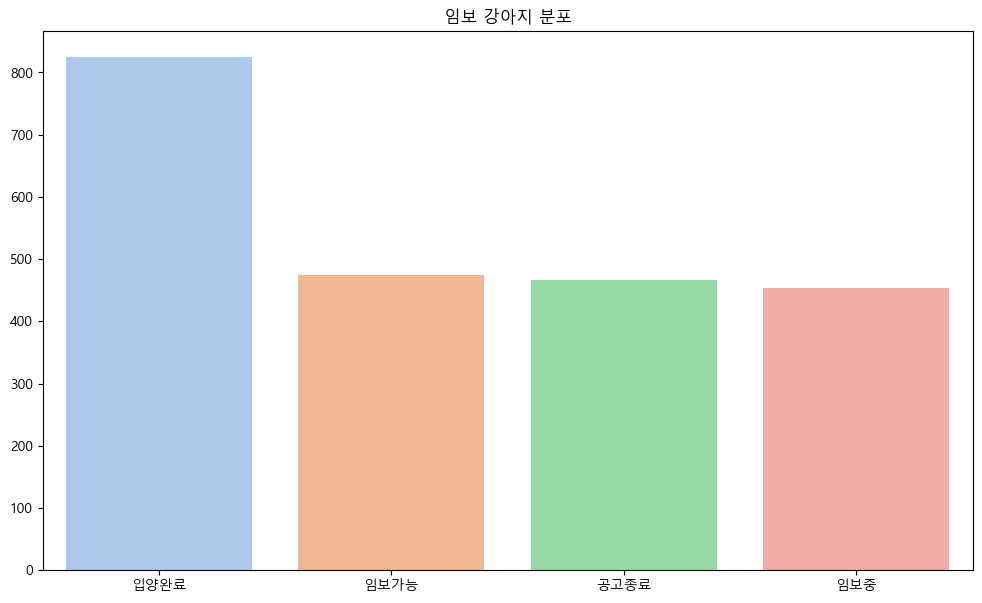

In [13]:
def classify_status(tag_list):
    if '공고종료' in tag_list:
        return '공고종료'
    elif '입양완료' in tag_list:
        return '입양완료'
    elif '임보중' in tag_list:
        return '임보중'
    else:
        return '임보가능'

dog_df['현재 상태'] = dog_df['tags'].apply(classify_status)

status_order = dog_df['현재 상태'].value_counts().sort_values(ascending=False).index.tolist()

plt.figure(figsize=(12, 7))
sns.countplot(data=dog_df, x='현재 상태',order=status_order,palette='pastel')
plt.title('임보 강아지 분포')
plt.xlabel('')
plt.ylabel('')
plt.show()

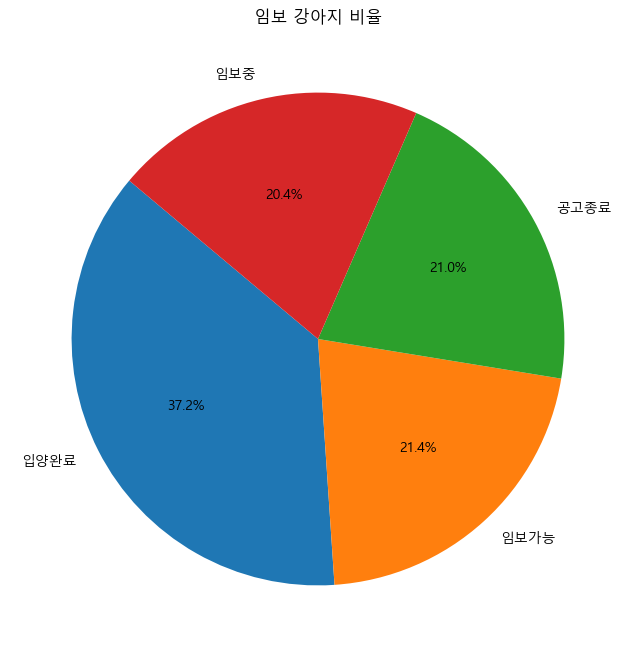

In [14]:
status_counts = dog_df['현재 상태'].value_counts()

labels = status_counts.index
sizes = status_counts.values

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('임보 강아지 비율')
plt.show()
